# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 
## Final Project: Mobility in United States During Covid

**Harvard University**<br/>
**Fall 2020**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner

<hr style="height:2.4pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
# styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
# HTML(styles)

### Import Libraries

In [2]:
%matplotlib inline
import numpy as np
import operator
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

### 1. Problem Overview

1. We are interested in overviewing how the coronavirus affected mobility trends in the United States?
    - We will start by examining overall mobility trends for the country as a whole.
    - Then we will look at specific states of interest and maybe a few important counties, like New York and Los Angeles
    
    

### 2. Obtaining Data

We will get out data from [Google Mobility](https://www.google.com/covid19/mobility/index.html?hl=en), which provides mobility data for each county in the US.

In [3]:
df = pd.read_csv("../../02_Data//05_Mobility/2020_US_Region_Mobility_Report.csv")

### 3. Data Handling/Cleaning

Let's quickly examine the data.

In [4]:
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0


In [5]:
df.tail()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
660120,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-10-28,NaN,NaN,NaN,NaN,-13.0,NaN
660121,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-10-29,NaN,NaN,NaN,NaN,-8.0,NaN
660122,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-10-30,NaN,NaN,NaN,NaN,-16.0,NaN
660123,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-11-02,NaN,NaN,NaN,NaN,-22.0,NaN
660124,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-11-03,NaN,NaN,NaN,NaN,-14.0,NaN


In [6]:
df.describe()

,metro_area,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,0.0,646712.000000,443515.000000,404583.000000,152333.000000,249575.000000,637564.000000,340316.000000
mean,NaN,30363.130548,-9.045033,1.985291,36.681907,-10.953685,-22.883033,7.438874
std,NaN,15299.215558,20.345065,14.589331,65.973724,26.118017,14.872121,6.247687
min,NaN,1001.000000,-100.000000,-96.000000,-91.000000,-92.000000,-92.000000,-46.000000
25%,NaN,18105.000000,-21.000000,-6.000000,-8.000000,-29.000000,-32.000000,3.000000
50%,NaN,29117.000000,-7.000000,1.000000,22.000000,-9.000000,-24.000000,6.000000
75%,NaN,45051.000000,4.000000,9.000000,68.000000,6.000000,-14.000000,11.000000
max,NaN,56045.000000,261.000000,225.000000,709.000000,252.000000,66.000000,38.000000


In [7]:
# let's take a look at the null values in `sub_region_1`
df.loc[df['sub_region_1'].isnull()]

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,US,United States,NaN,NaN,NaN,NaN,NaN,2020-10-30,-14.0,-4.0,1.0,-32.0,-30.0,8.0
259,US,United States,NaN,NaN,NaN,NaN,NaN,2020-10-31,-16.0,2.0,27.0,-23.0,-10.0,3.0
260,US,United States,NaN,NaN,NaN,NaN,NaN,2020-11-01,-18.0,-9.0,-5.0,-29.0,-15.0,4.0
261,US,United States,NaN,NaN,NaN,NaN,NaN,2020-11-02,-17.0,-7.0,-6.0,-35.0,-31.0,9.0


<div class="exercise"><b>Let's do a brief overview of how the data is organized in this dataset:</b><br>
    The <i>sub_region_1</i> column stores for what state the data is collected. Similarly, the <i>sub_region_2</i> column stores the counties in each state. However, the first 263 (or so) rows have null values for <i>sub_region_1</i> which store the mobility trends for the country as a whole. We can verify this by looking at the above cell, which displays all null values for <i>sub_region_1</i>. As we can see, the dates range from February 15, when the covid data starts being collected, to a few days ago, as Google Mobility update their data every few days. <br><br>
    The <i>sub_region_2</i> column similarly contains null values for the first 263 (or so) rows at the start of the entries for every new state. Additionally, the <i>iso_3166_2_code</i> column tells us what state's data we are viewing as a whole. In other words, once we start examining individual counties, the <i>iso_3166_2_code</i> column holds null values, but when we are examining data for the state as a whole, that column displays values of the form US-[state abbreviation]. We display the data points for the state of Alabama as a whole below, to visualize this.
</div>

In [8]:
df.loc[(df['sub_region_1'] == 'Alabama') & (df['sub_region_2'].isnull())]

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
263,US,United States,Alabama,NaN,NaN,US-AL,NaN,2020-02-15,5.0,2.0,39.0,7.0,2.0,-1.0
264,US,United States,Alabama,NaN,NaN,US-AL,NaN,2020-02-16,0.0,-2.0,-7.0,3.0,-1.0,1.0
265,US,United States,Alabama,NaN,NaN,US-AL,NaN,2020-02-17,3.0,0.0,17.0,7.0,-17.0,4.0
266,US,United States,Alabama,NaN,NaN,US-AL,NaN,2020-02-18,-4.0,-3.0,-11.0,-1.0,1.0,2.0
267,US,United States,Alabama,NaN,NaN,US-AL,NaN,2020-02-19,4.0,1.0,6.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,US,United States,Alabama,NaN,NaN,US-AL,NaN,2020-10-30,-6.0,-1.0,12.0,-6.0,-25.0,3.0
522,US,United States,Alabama,NaN,NaN,US-AL,NaN,2020-10-31,-11.0,6.0,47.0,-6.0,-9.0,-1.0
523,US,United States,Alabama,NaN,NaN,US-AL,NaN,2020-11-01,-10.0,-1.0,21.0,-7.0,-15.0,1.0
524,US,United States,Alabama,NaN,NaN,US-AL,NaN,2020-11-02,-9.0,-3.0,4.0,-9.0,-22.0,5.0


Again, we can see that there are 263 data points for the state of Alabama that store null values for the <i>sub_region_2</i> column, but have values for the <i>iso_3166_2_code</i> column. The date ranges are the same as for the data displayed for the country as a whole as well (from February 15, 2020, to around November 3, 2020).

<div class="exercise"><b>Now we can start inspecting and cleaning the data</b><br>
We can first drop the <i>census_fips_code</i> column since that does not give us much useful information.
</div>

In [9]:
df = df.drop(labels='census_fips_code', axis=1)

<div class="exercise">We can also check and see that the <i>metro_area</i> feature contains only NULL values, and so we can drop that column as well.</div>

In [10]:
# verify that `metro_area` doesn't contain any data
df['metro_area'].notnull().values.any()

False

In [11]:
# drop the column
df = df.drop(labels='metro_area', axis=1)

<div class="exercise">Finally, we can also drop the <i>country_region_code</i> and <i>country_region</i> columns since the entire dataset is entirely comprised of data from the United States, so those columns are redundant.</div>

In [12]:
# as a quick sanity check, just check that all the rows for those two columns contain what we expect
print(len(df.loc[df['country_region_code'] != 'US']), end=", ")
print(len(df.loc[df['country_region'] != 'United States']))

0, 0


In [13]:
# since all the rows for those columns contain what we expect, we can go ahead and delete them
df = df.drop(labels=['country_region_code', 'country_region'], axis=1)

Quickly check what our data looks like now.

In [14]:
df.shape

(660125, 10)

In [15]:
df.head()

,sub_region_1,sub_region_2,iso_3166_2_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,NaN,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,NaN,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,NaN,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,NaN,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,NaN,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0


<div class='exercise'>Let's now examine the data types and see if they make sense.</div>

In [16]:
df.dtypes

sub_region_1                                           object
sub_region_2                                           object
iso_3166_2_code                                        object
date                                                   object
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
dtype: object

All the types seem to make sense. The features which count percent change from baseline are all of type float, which is a good sanity check. Let's now check how many rows have data for all 6 predictors.

In [17]:
# there are 6 different place categories provided by google mobility, so let's store them in a simple list.
predictors = df.columns[4:].tolist()
predictors

['retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline']

In [18]:
# check how many rows have values for all 6 predictors
df2 = df.loc[df[predictors[0]].notnull() & df[predictors[1]].notnull() & df[predictors[2]].notnull() &
       df[predictors[3]].notnull() & df[predictors[4]].notnull() & df[predictors[5]].notnull()]
len(df2)

121692

It looks like about 1/6th of the original dataset contains values for all 6 predictors. We have stored this more complete dataset in another data frame, but will keep the original to see larger trends in the data.

<div class="exercise">Finally, let's take a look at summary statistics for both datasets</div>

In [19]:
df2.describe()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,121692.000000,121692.000000,121692.000000,121692.000000,121692.000000,121692.000000
mean,-18.174153,-3.334459,40.033396,-20.811705,-28.694976,9.436635
std,18.359708,12.249158,66.301059,24.365767,17.162810,7.083866
min,-98.000000,-96.000000,-90.000000,-92.000000,-88.000000,-26.000000
25%,-30.000000,-10.000000,-5.000000,-38.000000,-40.000000,4.000000
50%,-16.000000,-3.000000,26.000000,-21.000000,-31.000000,9.000000
75%,-5.000000,4.000000,71.000000,-2.000000,-17.000000,14.000000
max,152.000000,70.000000,658.000000,222.000000,27.000000,38.000000


In [20]:
df.describe()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,443515.000000,404583.000000,152333.000000,249575.000000,637564.000000,340316.000000
mean,-9.045033,1.985291,36.681907,-10.953685,-22.883033,7.438874
std,20.345065,14.589331,65.973724,26.118017,14.872121,6.247687
min,-100.000000,-96.000000,-91.000000,-92.000000,-92.000000,-46.000000
25%,-21.000000,-6.000000,-8.000000,-29.000000,-32.000000,3.000000
50%,-7.000000,1.000000,22.000000,-9.000000,-24.000000,6.000000
75%,4.000000,9.000000,68.000000,6.000000,-14.000000,11.000000
max,261.000000,225.000000,709.000000,252.000000,66.000000,38.000000


### 4. EDA

We will now explore our data to check for any patterns or other trends, which can help us with our modelling choices. 

Let's go through our predictors and see which days resulted in the largest percent change from baseline nationwide. We'll use the full dataset for individual predictor analysis.

1. Which dates had the highest decrease in retail and recreation mobility? (Places like restaurants, cafes, shopping centers, theme parks, museums, libraries, movie theaters, etc.)

In [21]:
df.loc[df['sub_region_1'].isnull()].sort_values(by=[predictors[0]])[0:10][['date', predictors[0]]]

,date,retail_and_recreation_percent_change_from_baseline
57,2020-04-12,-63.0
50,2020-04-05,-49.0
49,2020-04-04,-48.0
42,2020-03-28,-48.0
43,2020-03-29,-47.0
56,2020-04-11,-45.0
58,2020-04-13,-45.0
63,2020-04-18,-45.0
64,2020-04-19,-45.0
36,2020-03-22,-44.0


2. Which dates had the highest decrease in grocery and pharmacy mobility? (Places like grocery markets, food warehouses, farmers markets, specialty food shops, drug stores, pharmacies, etc.)

In [22]:
df.loc[df['sub_region_1'].isnull()].sort_values(by=[predictors[1]])[0:10][['date', predictors[1]]]

,date,grocery_and_pharmacy_percent_change_from_baseline
57,2020-04-12,-39.0
58,2020-04-13,-22.0
43,2020-03-29,-22.0
50,2020-04-05,-20.0
64,2020-04-19,-19.0
42,2020-03-28,-19.0
44,2020-03-30,-18.0
62,2020-04-17,-17.0
71,2020-04-26,-16.0
65,2020-04-20,-16.0


3. Which dates had the highest decrease in parks mobility? (Places like local parks, national parks, public beaches, marinas, dog parks, plazas, public gardens, etc.)

In [23]:
df.loc[df['sub_region_1'].isnull()].sort_values(by=[predictors[2]])[0:10][['date', predictors[2]]]

,date,parks_percent_change_from_baseline
57,2020-04-12,-36.0
58,2020-04-13,-31.0
42,2020-03-28,-25.0
49,2020-04-04,-24.0
37,2020-03-23,-23.0
62,2020-04-17,-22.0
48,2020-04-03,-21.0
54,2020-04-09,-21.0
55,2020-04-10,-21.0
50,2020-04-05,-20.0


4. Which dates had the highest decrease in transit stations mobility? (Places like public transport hubs such as subway, bus, train stations, etc.)

In [24]:
df.loc[df['sub_region_1'].isnull()].sort_values(by=[predictors[3]])[0:10][['date', predictors[3]]]

,date,transit_stations_percent_change_from_baseline
57,2020-04-12,-56.0
58,2020-04-13,-55.0
50,2020-04-05,-54.0
54,2020-04-09,-54.0
55,2020-04-10,-54.0
51,2020-04-06,-52.0
43,2020-03-29,-51.0
48,2020-04-03,-51.0
52,2020-04-07,-51.0
53,2020-04-08,-51.0


5. Which dates had the highest decrease in workplace mobility?

In [25]:
df.loc[df['sub_region_1'].isnull()].sort_values(by=[predictors[4]])[0:10][['date', predictors[4]]]

,date,workplaces_percent_change_from_baseline
100,2020-05-25,-72.0
205,2020-09-07,-71.0
139,2020-07-03,-57.0
55,2020-04-10,-56.0
54,2020-04-09,-52.0
58,2020-04-13,-51.0
52,2020-04-07,-51.0
53,2020-04-08,-51.0
47,2020-04-02,-50.0
48,2020-04-03,-50.0


6. Which dates had the highest decrease in residential mobility? 

In [26]:
df.loc[df['sub_region_1'].isnull()].sort_values(by=[predictors[5]])[0:10][['date', predictors[5]]]

,date,residential_percent_change_from_baseline
14,2020-02-29,-2.0
0,2020-02-15,-1.0
22,2020-03-08,-1.0
21,2020-03-07,-1.0
20,2020-03-06,-1.0
19,2020-03-05,-1.0
18,2020-03-04,-1.0
16,2020-03-02,-1.0
15,2020-03-01,-1.0
13,2020-02-28,-1.0


This was a good sanity check in that the trends we witnessed align with what we expect. It is also informative in its own right because we can quickly see which aspects of daily life were most impacted by the pandemic.

For example, what we immediately notice is that all of these really drastic decreases in mobility from the baseline occurred around either late March or early April, which is when the nation was severely locked down and when the pandemic hit really hard all around.

Additionally, we see that workplace and transit station mobility decreased most drastically in these 10 highest percentage changes from the baseline. This seems reasonable since the virus resulted in lockdowns which limited public transportation and a lot of companies and work places switched to remote work environments. 

Retail and recreation mobility also decreased a rather larger amount, with the largest percentage decrease around 60%. This seems reasonable since recreation is hardly a priority during a pandemic.

The parks percent changes from baseline were also rather large, with the top 10 values ranging from 20 to 36 percent. Similarly, the grocery and pharmacy mobility rates decreased for the top 10 values from around 16% to 39%. It also seems reasonable that park mobility decreased rather significantly as the virus spread, however it did not decrease as much as for workplace and transit mobility. The same holds true for grocery and pharmacy mobility. While there were lockdowns, people still had to visit grocery stores and pharmacies for supplies.

Lastly, we observe that residential mobility decreased very little, with the greatest decrease being 2%, which is insignificant. This is, of course, reasonable since people tend to remain indoors during a pandemic, especially when there are lockdowns. This also helps explain why we see some of the top 10 percentage decreases in residential mobility being in February, and none April. It just does not appear to be the case that the virus affected residential mobility all that much. 

<div class="exercise">Let's look at the distributions of each of the predictors nationally</div>

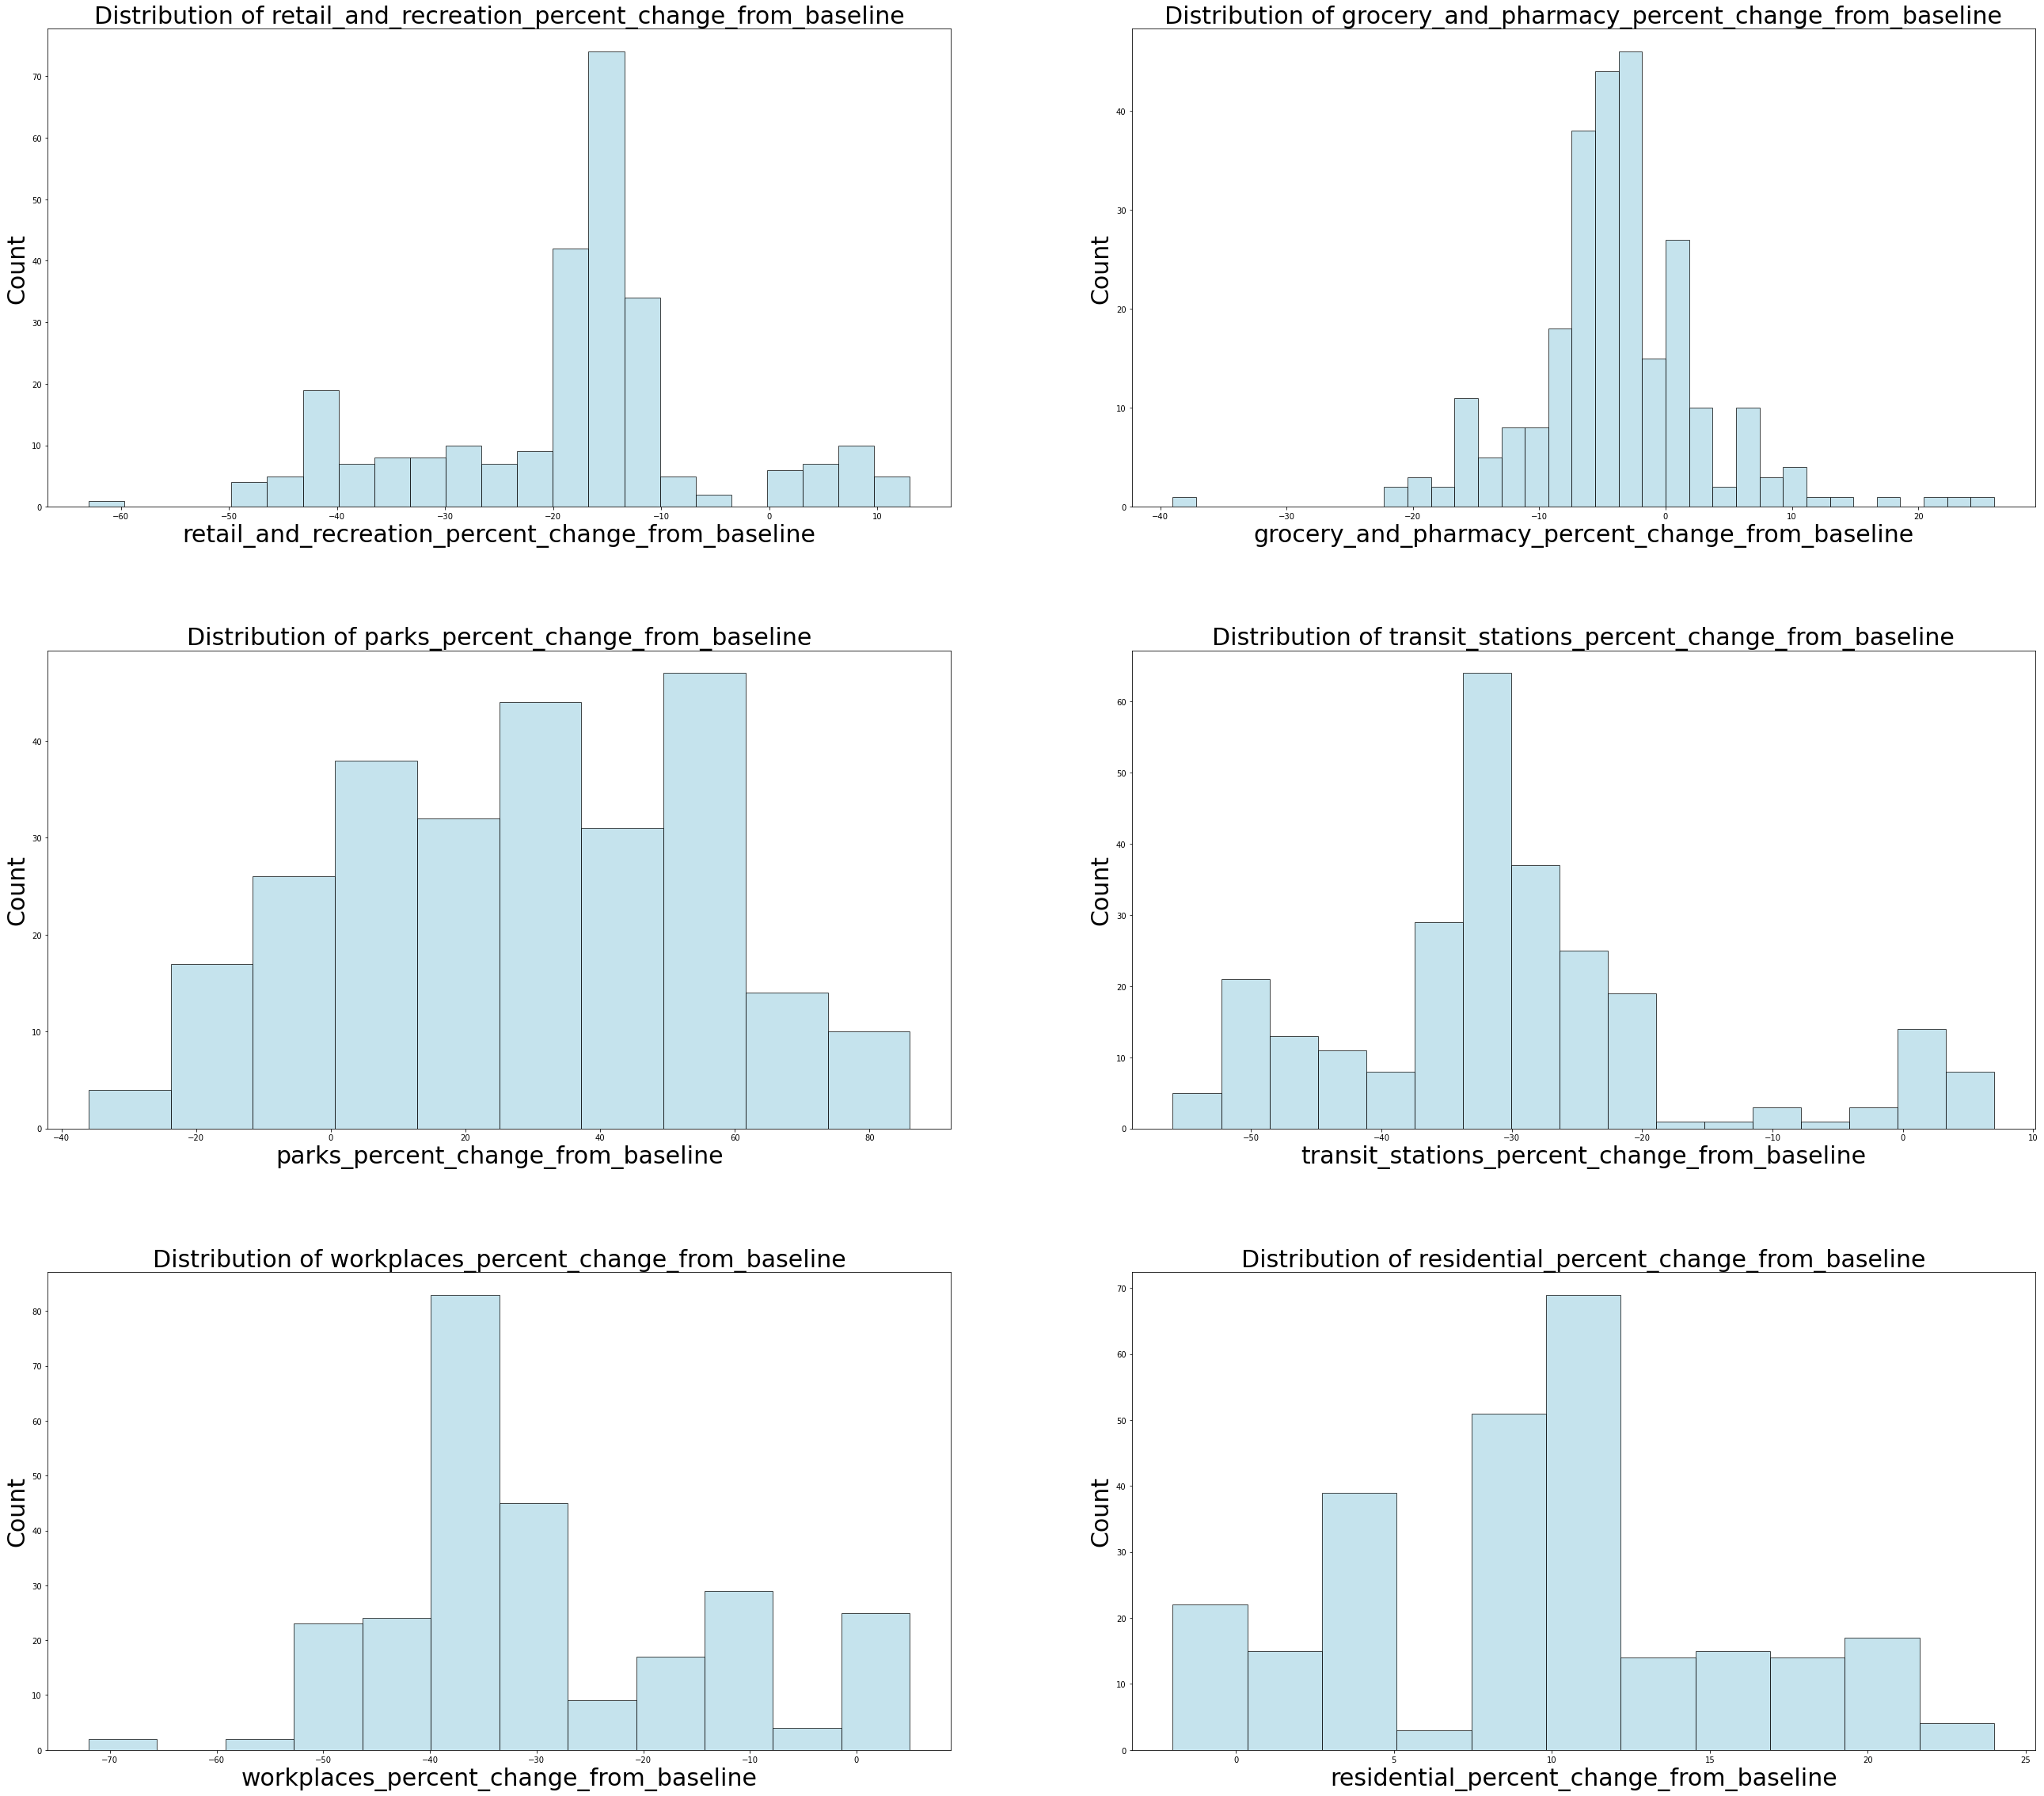

In [27]:
fontsize = 30
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(45, 40), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=0.3, wspace=0.2)
axs = axs.ravel()

for i, predictor in enumerate(predictors):
    axs[i].hist(df.loc[df['sub_region_1'].isnull()][predictor], alpha=0.7, color='lightblue', bins='auto', density=False, edgecolor='k')
    axs[i].set_title(f"Distribution of {predictor}", fontsize=fontsize)
    axs[i].set_xlabel(predictor, fontsize=fontsize)
    axs[i].set_ylabel("Count", fontsize=fontsize)


Let's now look at any potential correlation between our features. Again, we do this for the full dataset nationally.

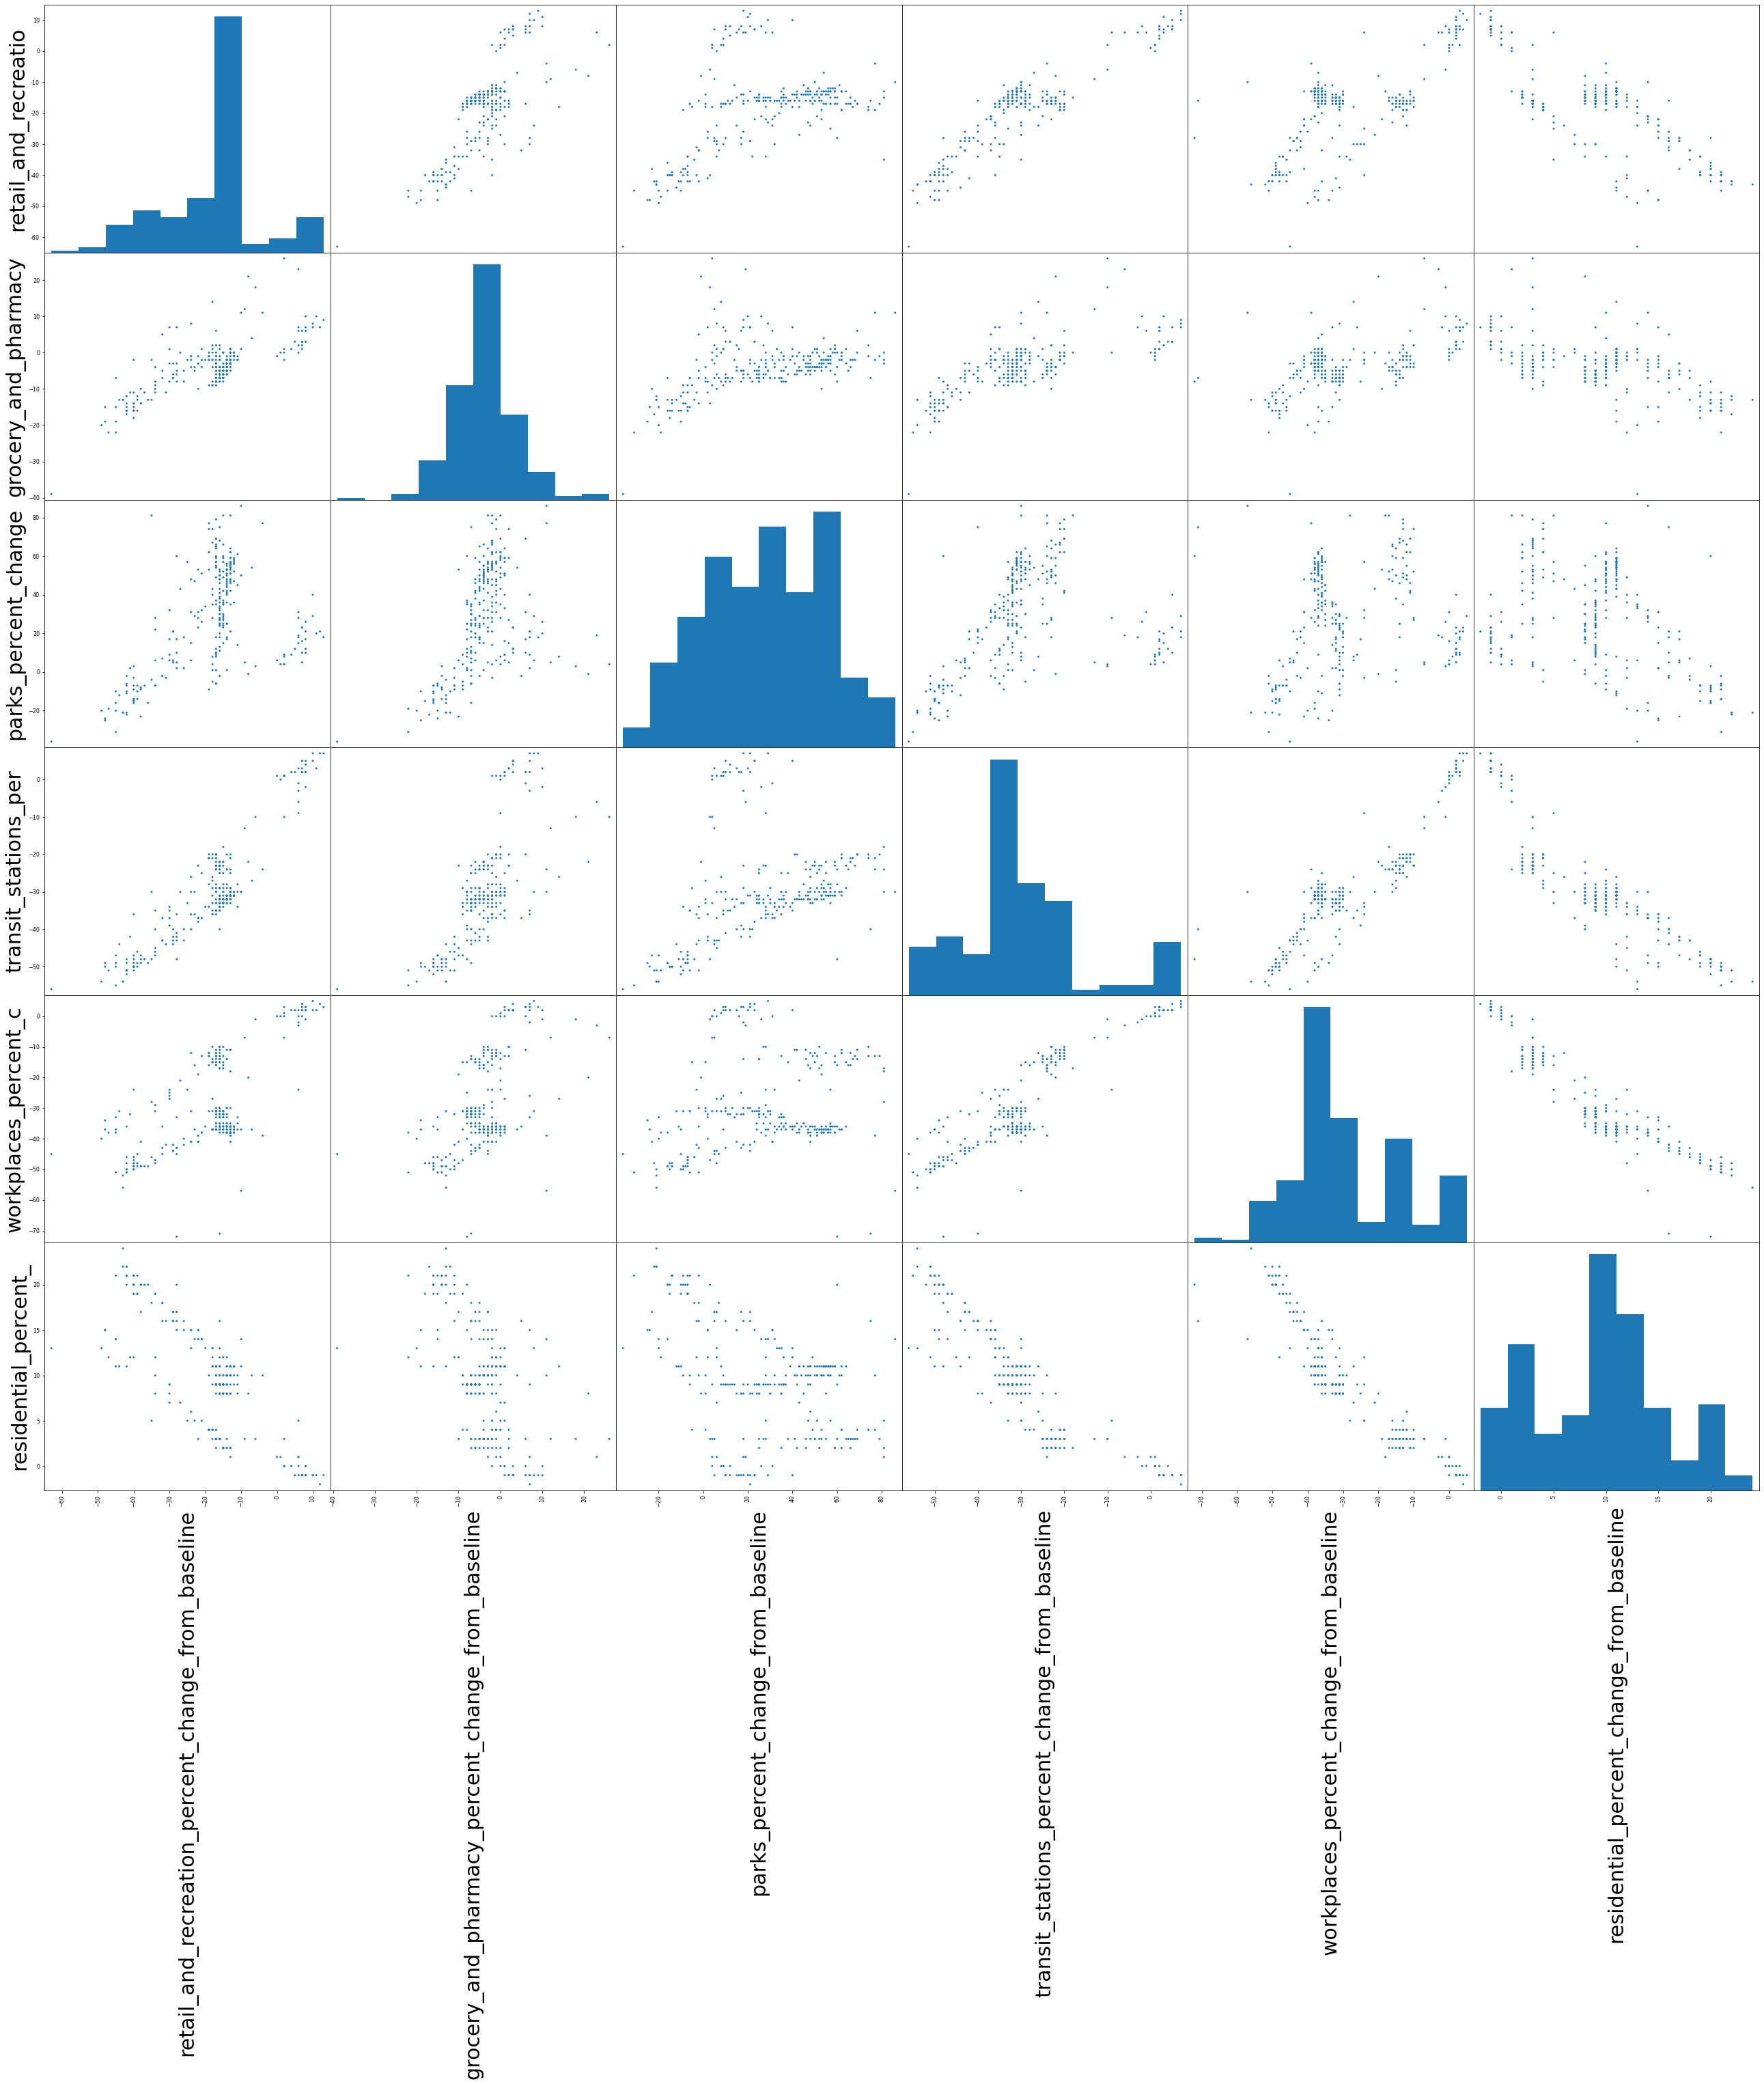

In [32]:
scatter = pd.plotting.scatter_matrix(df.loc[df['sub_region_1'].isnull()], alpha=1, figsize=(45, 40))
for ax in scatter.ravel():
    ax.set_xlabel(ax.get_xlabel(), rotation=90, fontsize=fontsize)
    ax.set_ylabel(ax.get_ylabel()[0:20], fontsize=fontsize)

We see that some predictors are more correlated than others. For example, retail and recreational mobility seems relatively strongly correlated with transit mobility.

<div class="exercise">Let's now take a look at how mobility changed nationally with each predictor graphically.</div>

In [33]:
# let's save the national data in its own dataframe
national_df = df.loc[df['sub_region_1'].isnull()]
national_df

,sub_region_1,sub_region_2,iso_3166_2_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,NaN,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,NaN,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,NaN,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,NaN,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,NaN,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
258,NaN,NaN,NaN,2020-10-30,-14.0,-4.0,1.0,-32.0,-30.0,8.0
259,NaN,NaN,NaN,2020-10-31,-16.0,2.0,27.0,-23.0,-10.0,3.0
260,NaN,NaN,NaN,2020-11-01,-18.0,-9.0,-5.0,-29.0,-15.0,4.0
261,NaN,NaN,NaN,2020-11-02,-17.0,-7.0,-6.0,-35.0,-31.0,9.0


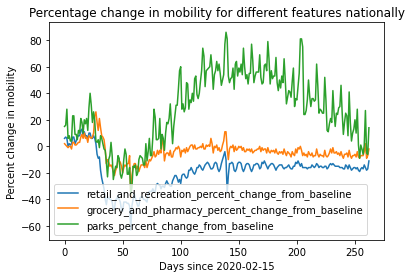

In [34]:
# plt.plot(national_df['date'], national_df['retail_and_recreation_percent_change_from_baseline'])
for predictor in predictors[0:3]:
    plt.plot(national_df[predictor], label=f"{predictor}")
    plt.title("Percentage change in mobility for different features nationally")
    plt.xlabel(f"Days since {national_df['date'][0]}")
    plt.ylabel("Percent change in mobility")
 
plt.legend()

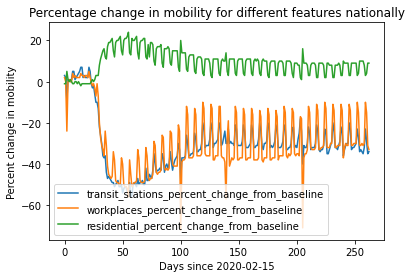

In [35]:
for predictor in predictors[3:]:
    plt.plot(national_df[predictor], label=f"{predictor}")
    plt.title("Percentage change in mobility for different features nationally")
    plt.xlabel(f"Days since {national_df['date'][0]}")
    plt.ylabel("Percent change in mobility")
    
plt.legend()

Now let's do the same for the smaller dataset that has values for all 6 predictors.

In [36]:
# let's save the national data in its own dataframe (again)
national_df2 = df2.loc[df['sub_region_1'].isnull()]
national_df2

,sub_region_1,sub_region_2,iso_3166_2_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,NaN,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,NaN,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,NaN,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,NaN,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,NaN,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
258,NaN,NaN,NaN,2020-10-30,-14.0,-4.0,1.0,-32.0,-30.0,8.0
259,NaN,NaN,NaN,2020-10-31,-16.0,2.0,27.0,-23.0,-10.0,3.0
260,NaN,NaN,NaN,2020-11-01,-18.0,-9.0,-5.0,-29.0,-15.0,4.0
261,NaN,NaN,NaN,2020-11-02,-17.0,-7.0,-6.0,-35.0,-31.0,9.0


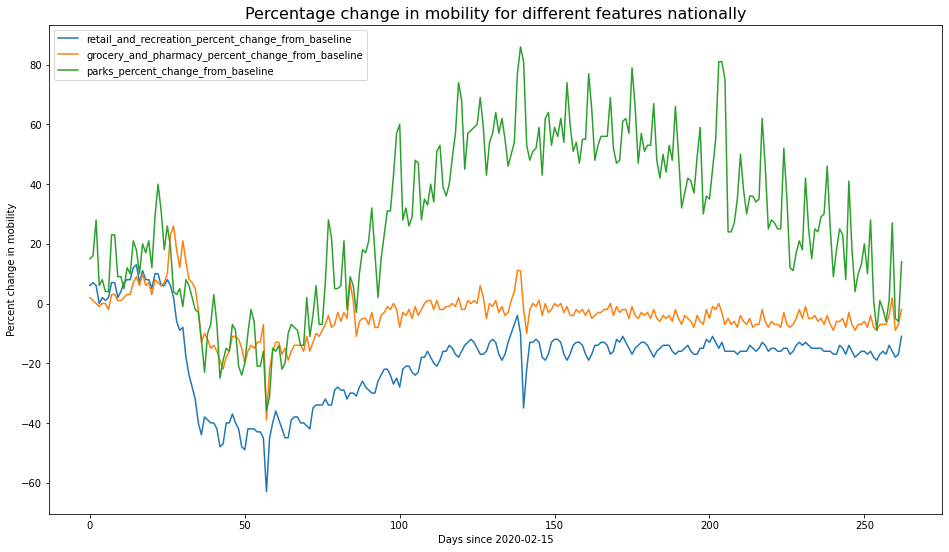

In [39]:
plt.figure(figsize=(16,9))
for predictor in predictors[0:3]:
    plt.plot(national_df[predictor], label=f"{predictor}")
    plt.title("Percentage change in mobility for different features nationally",fontsize=16)
    plt.xlabel(f"Days since {national_df['date'][0]}")
    plt.ylabel("Percent change in mobility")
    
plt.legend()

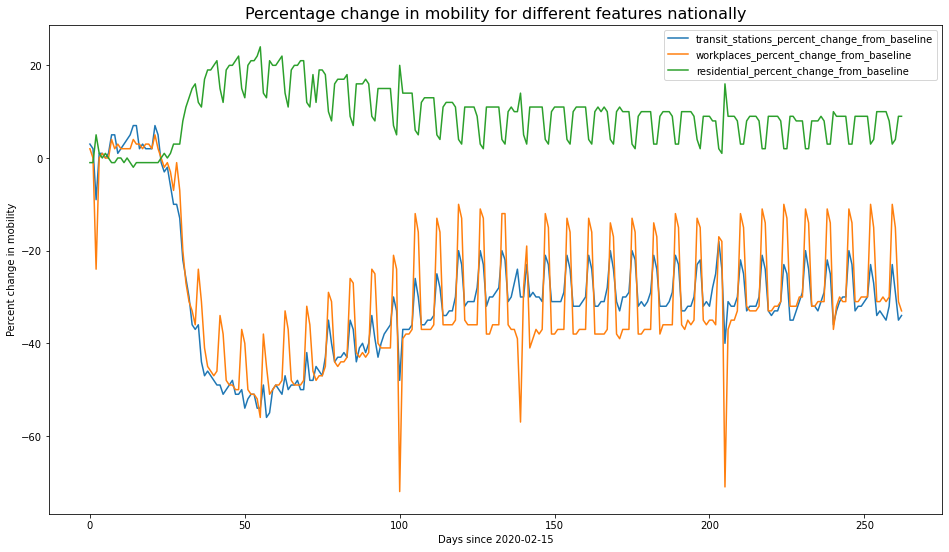

In [40]:
plt.figure(figsize=(16,9))
for predictor in predictors[3:]:
    plt.plot(national_df[predictor], label=f"{predictor}")
    plt.title("Percentage change in mobility for different features nationally",fontsize=16)
    plt.xlabel(f"Days since {national_df['date'][0]}")
    plt.ylabel("Percent change in mobility")
    
plt.legend()

As we can see, the two datasets do not seem to be very different at all, which suggests it would be reasonably to use the dataset that contains null values for certain features.

Additionally, what we see from these graphs is that the mobility for all but one of the predictors dropped significantly about 50 days from the time this data started getting collected. Residential mobility did not experience such a dip, in fact it seemed to spike, which seems reasonable since that's when people would remain home the most and not travel anyplace else. 

<div class="exercise">We can now do the same for any specific states and/or counties that we might be interested in.</div>

For example, let's take a look at how mobility in New York City was affected compared to the national trends.

In [ ]:
nyc_df = df.loc[(df['sub_region_1'] == 'New York') & (df['sub_region_2'] == 'New York County')]
nyc_df

In [ ]:
for predictor in predictors[0:3]:
    plt.plot(range(0, len(nyc_df[predictor])) , nyc_df[predictor], label=f"{predictor}")
    plt.title("Percentage change in mobility for different features nationally")
    plt.xlabel(f"Days since {nyc_df['date'].iloc[0]}")
    plt.ylabel("Percent change in mobility")
    
plt.legend()

In [ ]:
for predictor in predictors[3:]:
    plt.plot(range(0, len(nyc_df[predictor])) , nyc_df[predictor], label=f"{predictor}")
    plt.title("Percentage change in mobility for different features nationally")
    plt.xlabel(f"Days since {nyc_df['date'].iloc[0]}")
    plt.ylabel("Percent change in mobility")
    
plt.legend()

Although a crude comparison, we can see that while the trends for each predictor tend to be quite similar for New York County as nationally, some of the individual predictors behave more extreme. For example, mobility for parks and grocery shopping does not return to the baseline mobility like they do nationally. This seems reasonable since New York City was one of the hardest hit places by the virus.

We can explore this further with mathematical models...